In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

# these are the objects we need to impute missing data
# with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# to split the datasets
from sklearn.model_selection import train_test_split

### Scikit-Learn Mean/Median Imputation
--------------------------------

#### SimpleImputer

- [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)
- [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
- [Stackoverflow](https://stackoverflow.com/questions/54160370/how-to-use-sklearn-column-transformer)


In [24]:
# we use only the following variables for this
# 3 of which contain NA

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [25]:
# let's load the House Prices dataset

data = pd.read_csv('data/housing.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [26]:
data.isnull().mean()

LotFrontage    0.177397
OverallQual    0.000000
MasVnrArea     0.005479
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.055479
WoodDeckSF     0.000000
SalePrice      0.000000
dtype: float64

In [27]:
# let's separate into training and testing set

# first let's remove the target from the features
cols_to_use.remove('SalePrice')

x_train, x_test, y_train, y_test = train_test_split(
    data[cols_to_use], # just the features
    data['SalePrice'], # the target
    test_size=0.3, # the percentage of obs in the test set
    random_state=0
) # for reproducibility
x_train.shape, x_test.shape

((1022, 9), (438, 9))

In [28]:
# let's check the misssing data again
x_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

#### SimpleImputer on the entire dataset

In [29]:
# Now we impute the missing values with SimpleImputer

# create an instance of the simple imputer
# we indicate that we want to impute with the median
imputer = SimpleImputer(strategy='median')

# we fit the imputer to the train set
# the imputer will learn the median of all variables
imputer.fit(x_train[cols_to_use])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [30]:
imputer.statistics_

array([   6. ,  992. , 1095. , 1479. ,    0. ,  486.5,   69. ,    0. ,
       1979. ])

In [31]:
# and we can investigate the medians directly to corroborate
# the imputer did a good job
x_train[cols_to_use].median()

OverallQual       6.0
TotalBsmtSF     992.0
1stFlrSF       1095.0
GrLivArea      1479.0
WoodDeckSF        0.0
BsmtUnfSF       486.5
LotFrontage      69.0
MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64

In [32]:
# and now we impute the train and test set

# NOTE: the data is returned as a numpy array!!!
x_train = imputer.transform(x_train)
x_test = imputer.transform(x_test)

x_train

array([[   7., 1057., 1057., ...,   69.,  573., 1998.],
       [   6., 1291., 1291., ...,   69.,    0., 1996.],
       [   5.,  858.,  858., ...,   50.,    0., 1979.],
       ...,
       [   6.,    0., 1318., ...,   68.,    0., 1978.],
       [   7., 1374., 1557., ...,   69.,   18., 2003.],
       [   7., 1195., 1195., ...,   58.,   30., 1998.]])

In [33]:
# if we wanted to continue our data analysis, we would have to
# encode the train set back to a dataframe:

pd.DataFrame(x_train, columns=cols_to_use).head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
0,7.0,1057.0,1057.0,2034.0,576.0,318.0,69.0,573.0,1998.0
1,6.0,1291.0,1291.0,1291.0,307.0,288.0,69.0,0.0,1996.0
2,5.0,858.0,858.0,858.0,117.0,162.0,50.0,0.0,1979.0
3,6.0,560.0,698.0,1258.0,0.0,356.0,60.0,0.0,1939.0
4,2.0,290.0,438.0,438.0,0.0,0.0,60.0,0.0,1930.0


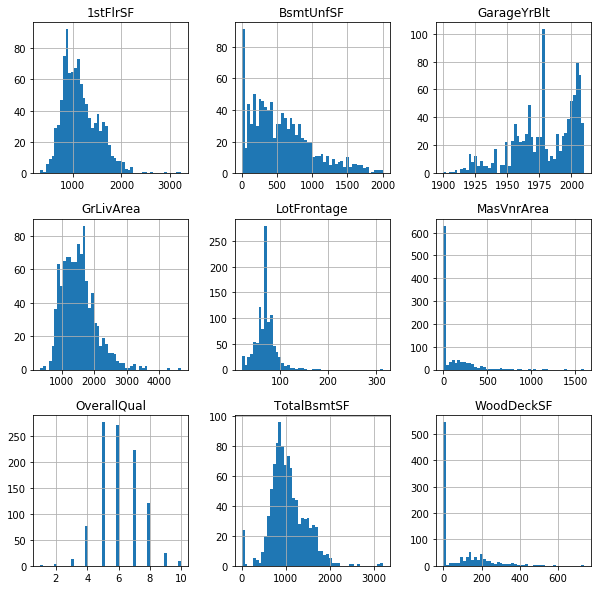

In [34]:
# Let's explore the change in the distributions after the median imputation

x_train = pd.DataFrame(x_train, columns=cols_to_use)
x_test = pd.DataFrame(x_test, columns=cols_to_use)

x_train.hist(bins=50, figsize=(10,10))
plt.show()

In [35]:
# first we need to make lists, indicating which features
# will be imputed with each method

numeric_features_mean = ['LotFrontage']
numeric_features_median = ['MasVnrArea', 'GarageYrBlt']

In [36]:
# then we instantiate the imputers, within a pipeline
# we create one mean imputer and one median imputer
# by changing the parameter in the strategy

numeric_mean_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
])

numeric_median_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
])


In [37]:
# then we put the features list and the transformers together
# using the column transformer

# we need to add remainder = True to indicate what we want
# ALL the columns returned at the end of the transformation
# and not just the engineered ones, which is the default
# behaviour of ColumnTransformer. 

preprocessor = ColumnTransformer(transformers=[
    ('mean_imputer', numeric_mean_imputer, numeric_features_mean),
    ('median_imputer', numeric_median_imputer, numeric_features_median)
], remainder='passthrough')


In [38]:
# now we fit the preprocessor
preprocessor.fit(x_train)

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('mean_imputer',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='mean',
                                                                verbose=0))],
                                          verbose=False),
                                 ['LotFrontage']),
                                ('median_imputer',
                                 Pipeline(memory=None,
              

In [39]:
# we can explore the transformers like this:
preprocessor.transformers

[('mean_imputer', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='mean',
                                 verbose=0))],
           verbose=False), ['LotFrontage']),
 ('median_imputer', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='median',
                                 verbose=0))],
           verbose=False), ['MasVnrArea', 'GarageYrBlt'])]

In [40]:
# and we can look at the parameters learnt like this:

# for the mean imputer
preprocessor.named_transformers_['mean_imputer'].named_steps['imputer'].statistics_

array([69.54500978])

In [41]:
# and we can corroborate the value with that one in
# the train set
x_train[numeric_features_mean].mean()

LotFrontage    69.54501
dtype: float64

In [42]:
# for the median imputerthere are 2 values learnt
# because we want to impute 2 different variables
preprocessor.named_transformers_['median_imputer'].named_steps['imputer'].statistics_

array([   0., 1979.])

In [43]:
# and we corroborate those values in the train set
x_train[numeric_features_median].median()

MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64

In [44]:
# and now we can impute the data
x_train = preprocessor.transform(x_train)

# and check it worked
np.mean(np.isnan(x_train))

0.0

In [45]:
# for test
x_test = preprocessor.transform(x_test)

# and check it worked
np.mean(np.isnan(x_test))

0.0

In [47]:
x_train, x_train.shape

(array([[  69.,  573., 1998., ..., 2034.,  576.,  318.],
        [  69.,    0., 1996., ..., 1291.,  307.,  288.],
        [  50.,    0., 1979., ...,  858.,  117.,  162.],
        ...,
        [  68.,    0., 1978., ..., 1902.,    0.,    0.],
        [  69.,   18., 2003., ..., 1557.,  143., 1374.],
        [  58.,   30., 1998., ..., 1839.,    0., 1195.]]), (1022, 9))

In [48]:
# if we want to put the array back into a dataframe, we need
# to be careful with the column order

# like this, we can explore the features used in each transformer
# including those in the remainder (the ones that were not transformed)
preprocessor.transformers_

[('mean_imputer', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='mean',
                                 verbose=0))],
           verbose=False), ['LotFrontage']),
 ('median_imputer', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='median',
                                 verbose=0))],
           verbose=False), ['MasVnrArea', 'GarageYrBlt']),
 ('remainder', 'passthrough', [0, 1, 2, 3, 4, 5])]

---------------------------
'remainder', 'passthrough', [0, 1, 2, 3, 4, 5]

the code above tells us that the remainder columns are those in position 0, 1, 2, 3, 4, 5 of the X_train

In [49]:
# let's capture the columns in a list

remainder_cols = [cols_to_use[c] for c in [0, 1, 2, 3, 4, 5]]
remainder_cols

['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'WoodDeckSF',
 'BsmtUnfSF']

In [51]:
# capture the data back in a dataframe
pd.DataFrame(x_train, columns=numeric_features_mean+numeric_features_median+remainder_cols).head()

,LotFrontage,MasVnrArea,GarageYrBlt,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF
0,69.0,573.0,1998.0,7.0,1057.0,1057.0,2034.0,576.0,318.0
1,69.0,0.0,1996.0,6.0,1291.0,1291.0,1291.0,307.0,288.0
2,50.0,0.0,1979.0,5.0,858.0,858.0,858.0,117.0,162.0
3,60.0,0.0,1939.0,6.0,560.0,698.0,1258.0,0.0,356.0
4,60.0,0.0,1930.0,2.0,290.0,438.0,438.0,0.0,0.0
